<a href="https://colab.research.google.com/github/HPractor/SalesPrediction/blob/main/Salesprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [ ]:
a=pd.read_csv('advertising (1).csv')

# **Displaying the Dataset**

In [ ]:
# first five rows
a.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Checking for Nan values**

In [ ]:
print("NaN Values in Each Column:")
print(a.isna().sum())

NaN Values in Each Column:
TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64


# **Checking for Duplicate values**

In [ ]:
duplicates = a.duplicated()


In [ ]:
print("Number of duplicate rows:", duplicates.sum())


Number of duplicate rows: 0


## **Visualizing the Dataset**

<ipython-input-40-d114f671f274>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['TV'])
<ipython-input-40-d114f671f274>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a['Radio'])
<ipython-input-40-d114f671f274>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in sea

Text(0.5, 1.0, 'Newspaper')

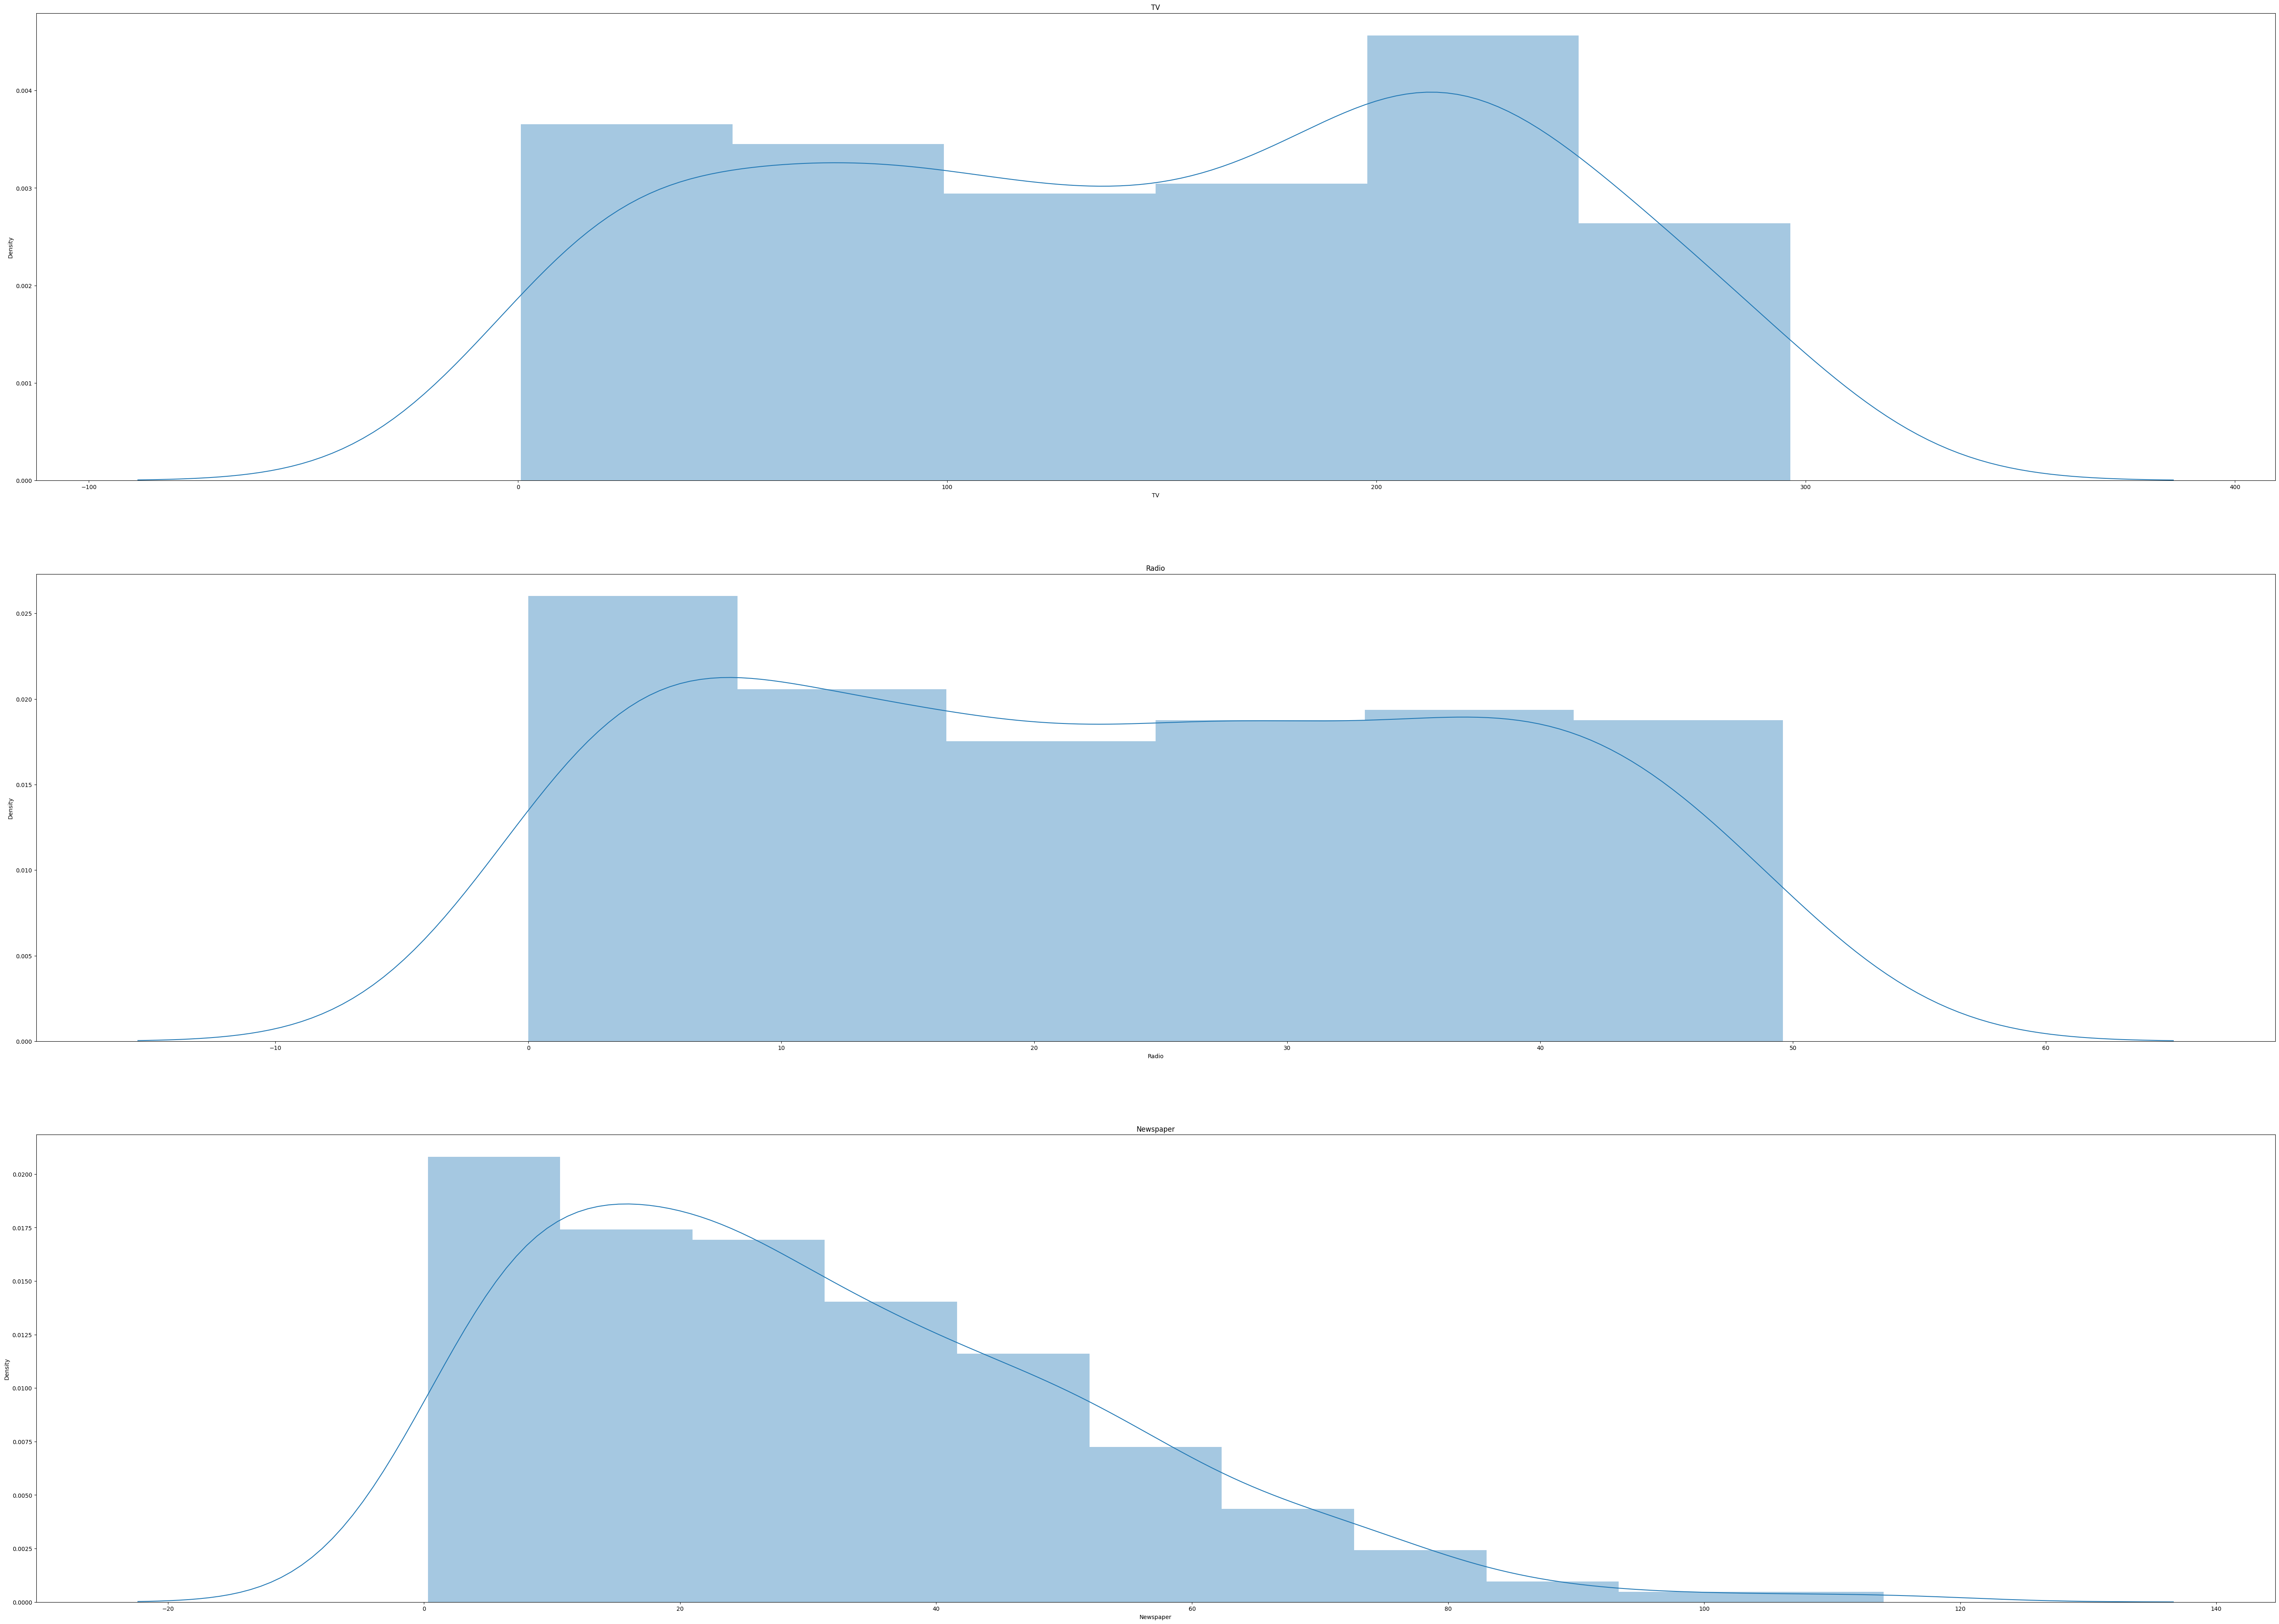

In [ ]:
plt.figure(figsize=[70,50])
plt.subplot(3,1,1)
sns.distplot(a['TV'])
plt.title('TV')

plt.subplot(3,1,2)
sns.distplot(a['Radio'])
plt.title('Radio')

plt.subplot(3,1,3)
sns.distplot(a['Newspaper'])
plt.title('Newspaper')

# **Train Test Split**

In [ ]:
train,test=train_test_split(a,test_size=0.3)

In [ ]:
train_x=train.drop(['Sales'],axis=1)

In [ ]:
train_y=train['Sales']

In [ ]:
test_x=test.drop(['Sales'],axis=1)

In [ ]:
test_y=test['Sales']

# **Linear Regression**

In [ ]:
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [ ]:
prediction = model.predict(test_x)


In [ ]:
r2_model_score = model.score(test_x,test_y)
print(r2_model_score)

0.9227444671817837


In [ ]:
from sklearn.metrics import mean_squared_error
lin_reg = LinearRegression()
lin_reg.fit(train_x, train_y)
y_pred= lin_reg.predict(test_x)
print(f'Linear Regression MSE: {mean_squared_error(test_y, y_pred)}')


Linear Regression MSE: 2.2425759672329093


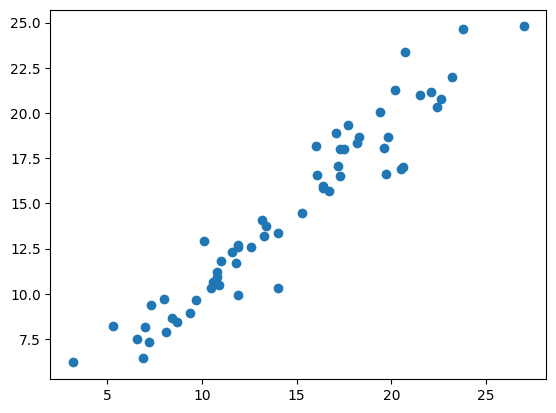

In [ ]:
plt.scatter(test_y, y_pred)
plt.show()

# **Random Forest Regression**

In [ ]:
from sklearn.ensemble import RandomForestRegressor


In [ ]:
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(train_x, train_y)
y_pred = rf_reg.predict(test_x)

In [ ]:
print(f'Random Forest Regression MSE: {mean_squared_error(test_y, y_pred)}')

Random Forest Regression MSE: 1.5225695666666619


In [ ]:
r2_model_score = rf_reg.score(test_x, test_y)
print(f'R-squared (model score method): {r2_model_score}')

R-squared (model score method): 0.9475482994358615


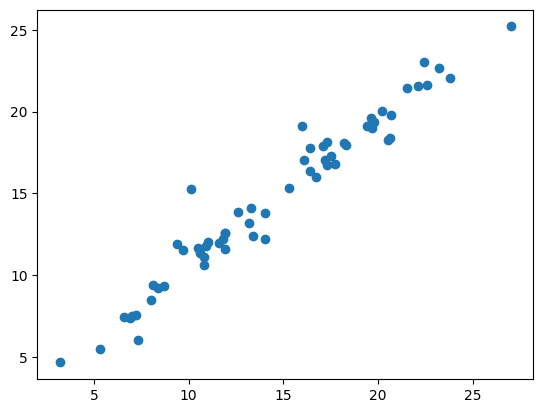

In [ ]:
plt.scatter(test_y, y_pred)
plt.show()

# **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(train_x, train_y)
y_pred_lasso = lasso_reg.predict(test_x)
print(f'Lasso Regression MSE: {mean_squared_error(test_y, y_pred_lasso)}')

Lasso Regression MSE: 2.243424287712007


In [ ]:
r2_model_score = lasso_reg.score(test_x, test_y)
print(f'R-squared (model score method): {r2_model_score}')

R-squared (model score method): 0.9227152429987143


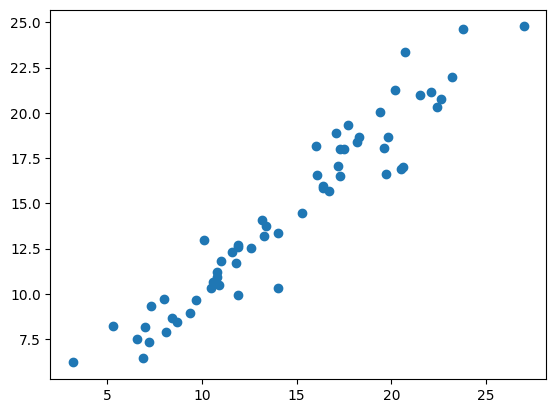

In [ ]:
plt.scatter(test_y, y_pred_lasso)
plt.show()

# **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge


In [ ]:
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(train_x, train_y)
y_pred_ridge = ridge_reg.predict(test_x)
print(f'Ridge Regression MSE: {mean_squared_error(test_y, y_pred_ridge)}')

Ridge Regression MSE: 2.2425875892399647


In [ ]:
r2_model_score = ridge_reg.score(test_x, test_y)
print(f'R-squared (model score method): {r2_model_score}')

R-squared (model score method): 0.9227440668099075


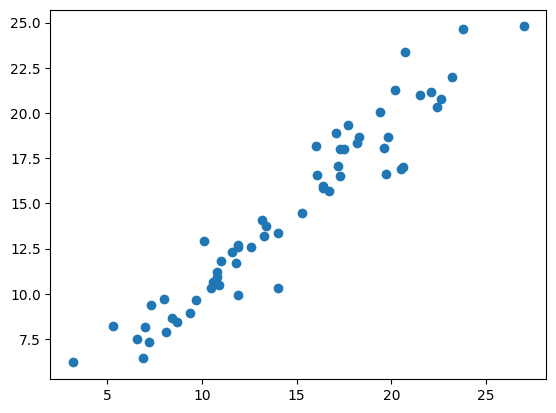

In [ ]:
plt.scatter(test_y, y_pred_ridge)
plt.show()